# Multivariant Linear Regression

Boston house price prediction 

Problem: predicts the price of houses in Boston using a machine learning algorithm called Linear Regression.
         To train our machine learning model ,we will be using scikit-learn’s boston dataset.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.datasets import load_boston

In [3]:
# load boston data completely
boston = load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [5]:
boston.keys() # columns in dataset (dataset is in dictionary format hence key() is used

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

'data' = Returns the data matrix.

'target'= Returns the regression target. 

'feature_names' = Returns the names of features

'DESCR' = Returns the full description of the dataset.

In [7]:
boston['data'].shape # No. of rows and No. of columns

(506, 13)

In [14]:
 print(boston.data)  # 2-D array since x(Features)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [12]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [11]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [13]:
print(boston.target)  # 1-D array since y(label)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [15]:
# convert boston data into dataframe
bos = pd.DataFrame(boston.data)
bos

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [16]:
bos.columns = boston.feature_names  # givig feature_name to all columns

In [17]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
# To add price column in dataframe
bos['PRICE'] = boston.target

In [26]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
# Divide dataset into x(features as i/p) and y(label as o/p)
y = bos['PRICE']
x = bos.drop('PRICE', axis=1)

In [33]:
print(f"Dimension of x:{x.ndim}")
print(x.head())

Dimension of x:2
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [35]:
print(f"Dimension of y:{y.ndim}")
print(y.head())

Dimension of y:1
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64


In [36]:
# Divide dataset(x,y) into testing data as xtest,ytest and training data as xtrain,ytrain
import sklearn
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.33, random_state=1) # random_size: reproduce same dataset for training and testing after running algorithm everytime

In [37]:
# Creating simple linear model
from sklearn.linear_model import LinearRegression
model = LinearRegression()  # y=ax+b

In [38]:
# Train our model by providing training data
Mymodel = model.fit(xtrain,ytrain)
Mymodel

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
# Prediction by our model
y_pred_train = Mymodel.predict(xtrain)
y_pred_test = Mymodel.predict(xtest)

In [40]:
# Difference of y_pred(predicted data by our model) and ytest(actual data in dataset)
df = pd.DataFrame(y_pred_test, ytest)
df.head()

,0
PRICE,
28.2,32.458269
23.9,28.037282
16.6,17.936472
22.0,21.283249
20.8,18.424839


In [51]:
m = Mymodel.coef_ # coefficient value calculated by our model 
m_df = pd.DataFrame(m)
m_df

,0
0,-0.099200
1,0.062781
2,0.072581
3,3.010774
4,-20.661788
5,3.444966
6,0.003780
7,-1.448275
8,0.309305
9,-0.011649


In [52]:
c = Mymodel.intercept_  # intercept value calculated by our model
c

39.68280792749981

In [60]:
# coefficient of determination
from sklearn.metrics import r2_score, mean_squared_error

y_pred = Mymodel.predict(xtest)
vif = r2_score(ytest,y_pred)
y_pred = Mymodel.predict(xtest)  # prdicted values
a = r2_score(ytest,y_pred)  # accuracy
msr = mean_squared_error(ytest,y_pred)  #  mean_squared_error

In [56]:
print("coefficient(m):",m)
print("Intercept(c):",c)
print("Accuracy(a):",a)
print("Mean Squared Error(msr):",msr)
print("variance Inflation Factor(VIF):",vif)

coefficient(m): [-9.91995332e-02  6.27806786e-02  7.25812126e-02  3.01077411e+00
 -2.06617880e+01  3.44496595e+00  3.78004138e-03 -1.44827470e+00
  3.09305140e-01 -1.16485640e-02 -9.46002716e-01  7.20017685e-03
 -5.28368116e-01]
Intercept(c): 39.68280792749981
Accuracy(a): 0.7649416667641522
Mean Squared Error(msr): 20.698475744484448
variance Inflation Factor(VIF): 0.7649416667641522


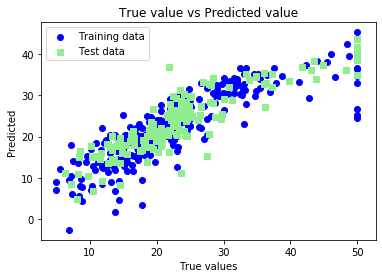

In [59]:
# visualize line by scatter plot
plt.scatter(ytrain ,y_pred_train,c='blue',marker='o',label='Training data')

plt.scatter(ytest,y_pred_test ,c='lightgreen',marker='s',label='Test data')

plt.xlabel('True values')

plt.ylabel('Predicted')

plt.title("True value vs Predicted value")

plt.legend(loc= 'upper left')

#plt.hlines(y=0,xmin=0,xmax=50)

plt.plot()

plt.show()